Source: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [6]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_regression
from collections import defaultdict
import missingno as msno


In [7]:
df = pd.read_csv("Data/county_data_clean.csv").drop(columns="Unnamed: 0")
df = df[df.state_abbreviation!='US']

In [8]:
df.shape

(3193, 156)

In [9]:
features_df = df.drop(['uninsured_adults', 'uninsured_children', 'county_fips_code',
                   '5_digit_fips_code'], axis = 1)
# Replacing missing value of uninsured with mean of uninsured
features_df['uninsured'] = features_df.uninsured.replace([float("nan")], features_df.uninsured.mean())

for column in features_df.columns:
    na_sum= (features_df[column].isna().sum())
    column_size = (features_df[column].size)
    #print(na_sum/column_size)
    if (features_df[column].isna().sum()/features_df[column].size) > 0.25:
        features_df = features_df.drop(columns=column)
features_df.shape

(3193, 77)

In [10]:
state_groupby = features_df.groupby('state_abbreviation').count()

In [11]:
state_groupby = features_df.groupby('state_abbreviation').count()
null_count_dict = defaultdict(int)

for column in state_groupby.columns:
    null_count_dict[column] = 0
    for state in state_groupby.index:
        value = state_groupby.loc[state][column]
        size = state_groupby.loc[state]['state_fips_code']
        if (value/size) <= 0.25:
            print("{0} is not useful for {1}: {2}".format(column, state, str(value/size)))
            null_count_dict[column] += 1
            
exclude_features = []
for feature, null_count in null_count_dict.items():
    if null_count > 13:
        exclude_features.append(feature.strip(""))

null_count_dict

air_pollution__particulate_matter is not useful for AK: 0.0
air_pollution__particulate_matter is not useful for HI: 0.0
drinking_water_violations is not useful for HI: 0.0
hiv_prevalence is not useful for ND: 0.24074074074074073
hiv_prevalence is not useful for NE: 0.13829787234042554
hiv_prevalence is not useful for SD: 0.014925373134328358
children_eligible_for_free_or_reduced_price_lunch is not useful for DC: 0.0
children_eligible_for_free_or_reduced_price_lunch is not useful for DE: 0.0
children_eligible_for_free_or_reduced_price_lunch is not useful for MA: 0.0
children_eligible_for_free_or_reduced_price_lunch is not useful for TN: 0.0


defaultdict(int,
            {'state_fips_code': 0,
             'name': 0,
             'premature_death': 0,
             'poor_or_fair_health': 0,
             'poor_physical_health_days': 0,
             'poor_mental_health_days': 0,
             'low_birthweight': 0,
             'adult_smoking': 0,
             'adult_obesity': 0,
             'food_environment_index': 0,
             'physical_inactivity': 0,
             'access_to_exercise_opportunities': 0,
             'excessive_drinking': 0,
             'alcohol_impaired_driving_deaths': 0,
             'sexually_transmitted_infections': 0,
             'teen_births': 0,
             'uninsured': 0,
             'primary_care_physicians': 0,
             'ratio_of_population_to_primary_care_physicians': 0,
             'dentists': 0,
             'ratio_of_population_to_dentists': 0,
             'mental_health_providers': 0,
             'ratio_of_population_to_mental_health_providers': 0,
             'preventable_hospi

In [12]:
features_df = features_df.drop(columns = exclude_features)

<AxesSubplot:>

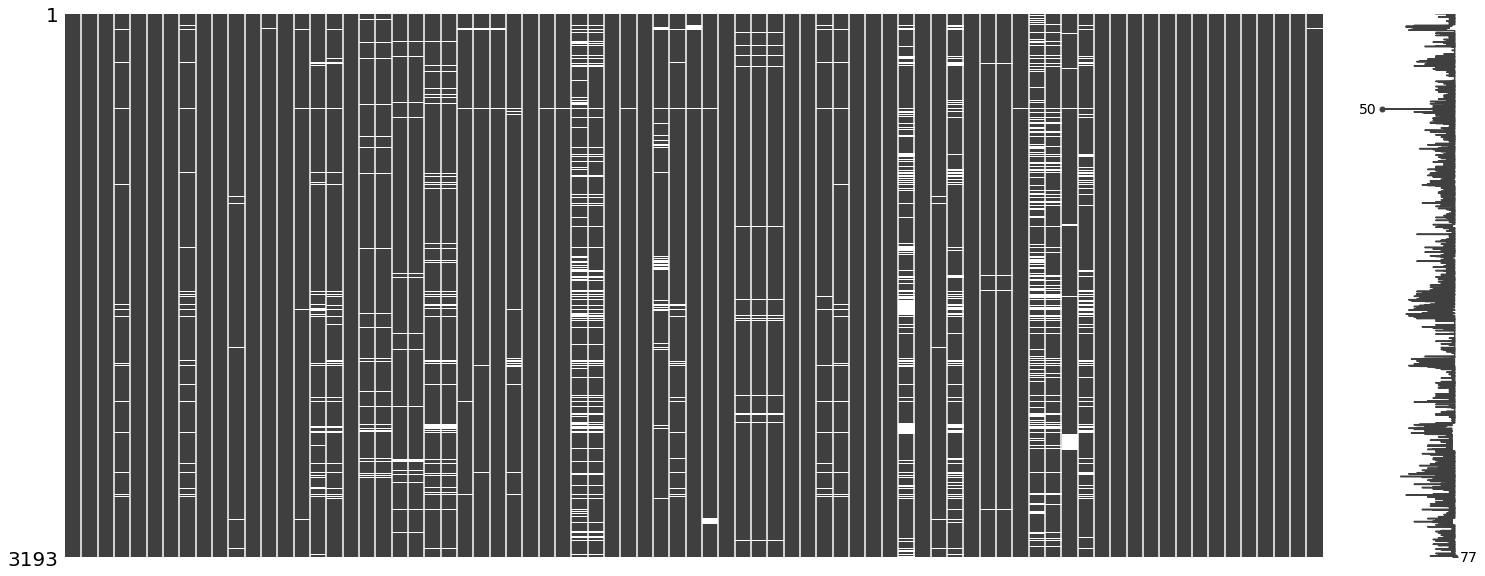

In [13]:
# Illustrate missing data
msno.matrix(features_df)

In [14]:
features = features_df.drop(['uninsured','state_fips_code','state_abbreviation', 'name'], axis = 1)
features_list = features_df.drop(['uninsured','state_fips_code','state_abbreviation'], axis = 1).columns.to_list()
imp = SimpleImputer()
features = imp.fit_transform(features)

labels = np.array(features_df['uninsured'])




In [15]:
"""
# Computing Variance Inflation Factors
sub_df = pd.DataFrame(data=features, columns=features_list)
vif_data_copy = sub_df.copy()


while not vif_data_copy.empty:
    print("entered")
    interesting_vars = sub_df.columns.to_list()
    X = sub_df[interesting_vars]

    # VIF dataframe
    print("entered again")
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    # calculating VIF for each feature
    
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                              for i in range(len(X.columns))]

    print(vif_data)

    if float('inf') in vif_data["VIF"].unique():
        feature_list = vif_data[vif_data['VIF']==float("inf")].feature.to_list()
        sub_df = sub_df.drop(columns=feature_list[0])
        vif_data_copy = vif_data[vif_data.feature!= feature_list[0]]
    elif ~ vif_data[vif_data['VIF'] >= 5].empty:
        feature_list = vif_data[vif_data['VIF']>= 5].feature.to_list()
        sub_df = sub_df.drop(columns=feature_list[0])
        vif_data_copy = vif_data[vif_data.feature!= feature_list[0]]
    else:
        vif_data_copy = pd.DataFrame()

sub_df
"""

'\n# Computing Variance Inflation Factors\nsub_df = pd.DataFrame(data=features, columns=features_list)\nvif_data_copy = sub_df.copy()\n\n\nwhile not vif_data_copy.empty:\n    print("entered")\n    interesting_vars = sub_df.columns.to_list()\n    X = sub_df[interesting_vars]\n\n    # VIF dataframe\n    print("entered again")\n    vif_data = pd.DataFrame()\n    vif_data["feature"] = X.columns\n\n    # calculating VIF for each feature\n    \n    vif_data["VIF"] = [variance_inflation_factor(X.values, i)\n                              for i in range(len(X.columns))]\n\n    print(vif_data)\n\n    if float(\'inf\') in vif_data["VIF"].unique():\n        feature_list = vif_data[vif_data[\'VIF\']==float("inf")].feature.to_list()\n        sub_df = sub_df.drop(columns=feature_list[0])\n        vif_data_copy = vif_data[vif_data.feature!= feature_list[0]]\n    elif ~ vif_data[vif_data[\'VIF\'] >= 5].empty:\n        feature_list = vif_data[vif_data[\'VIF\']>= 5].feature.to_list()\n        sub_df = su

In [16]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 42)


In [17]:
# Random forest regressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(train_features, train_labels)

RandomForestRegressor(random_state=42)

In [18]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'percent.')

Mean Absolute Error: 0.02 percent.


In [19]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 80.95 %.


In [20]:
name = features[:, features_list.index('name')]
test_name = test_features[:, features_list.index('name')]


# Dataframe with true values
true_data = pd.DataFrame(data = {'county_name': name, 'actual': labels})

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'county_name': test_name, 'prediction': predictions})

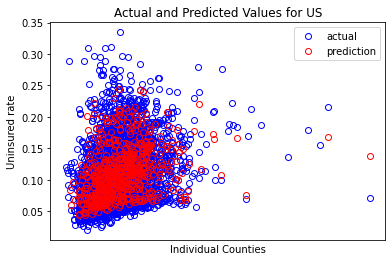

In [21]:
# Plot the actual values
plt.plot(true_data['county_name'], true_data['actual'], 'bo', label = 'actual', markerfacecolor='none')
# Plot the predicted values
plt.plot(predictions_data['county_name'], predictions_data['prediction'], 'ro', label = 'prediction',
        markerfacecolor='none')

plt.xticks([]); 
plt.legend()
# Graph labels
plt.xlabel('Individual Counties'); plt.ylabel('Uninsured rate'); plt.title('Actual and Predicted Values for {}'.format('US'));

Source: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [27]:
importances = rf.feature_importances_
importances

array([0.00261961, 0.00569046, 0.00225346, 0.00829578, 0.00498418,
       0.00423544, 0.00856086, 0.00462465, 0.01223614, 0.00536589,
       0.06254407, 0.00448927, 0.00292718, 0.00952073, 0.00188428,
       0.00256044, 0.0076562 , 0.00378123, 0.0064764 , 0.0367863 ,
       0.00523714, 0.00738383, 0.00317083, 0.01118056, 0.05389925,
       0.0112198 , 0.00729899, 0.00256985, 0.00278314, 0.00318044,
       0.0037006 , 0.00369375, 0.00688948, 0.0036578 , 0.01192433,
       0.00067108, 0.00316816, 0.00462547, 0.01410284, 0.00417377,
       0.01464355, 0.00407359, 0.00253133, 0.00307234, 0.00277022,
       0.00321125, 0.00323732, 0.00255177, 0.0115662 , 0.00342242,
       0.07177789, 0.03648123, 0.00278282, 0.00241992, 0.00579173,
       0.0033844 , 0.00332802, 0.05896749, 0.00385799, 0.00387362,
       0.00395563, 0.00853774, 0.00615237, 0.00877641, 0.01322086,
       0.03252869, 0.00407629, 0.0049043 , 0.03078222, 0.23173116,
       0.03951522, 0.00355326, 0.00649704])

In [24]:
features_list

['name',
 'premature_death',
 'poor_or_fair_health',
 'poor_physical_health_days',
 'poor_mental_health_days',
 'low_birthweight',
 'adult_smoking',
 'adult_obesity',
 'food_environment_index',
 'physical_inactivity',
 'access_to_exercise_opportunities',
 'excessive_drinking',
 'alcohol_impaired_driving_deaths',
 'sexually_transmitted_infections',
 'teen_births',
 'primary_care_physicians',
 'ratio_of_population_to_primary_care_physicians',
 'dentists',
 'ratio_of_population_to_dentists',
 'mental_health_providers',
 'ratio_of_population_to_mental_health_providers',
 'preventable_hospital_stays',
 'mammography_screening',
 'flu_vaccinations',
 'high_school_graduation',
 'some_college',
 'unemployment',
 'children_in_poverty',
 'children_in_poverty_hispanic',
 'children_in_poverty_white',
 'income_inequality',
 'children_in_single_parent_households',
 'social_associations',
 'violent_crime',
 'injury_deaths',
 'air_pollution__particulate_matter',
 'drinking_water_violations',
 'severe_h

In [34]:
forest_importances = pd.Series(importances, index=features_list)
std = np.std([
    tree.feature_importances_ for tree in rf.estimators_], axis=0)

<ipython-input-35-ab46c4b15b6e>:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


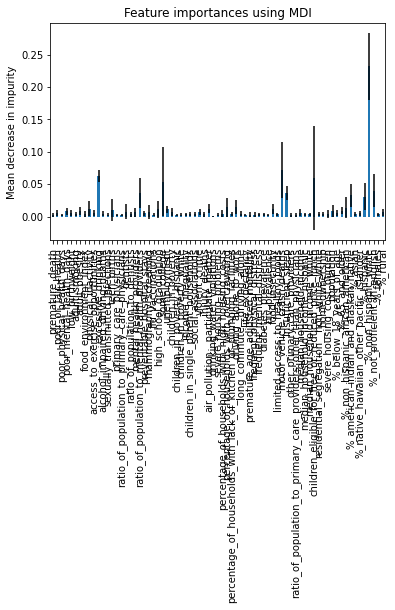

In [35]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()